In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy import stats
import scipy.io
import pywt
import math
import ssqueezepy
from ssqueezepy import cwt
from ssqueezepy.visuals import plot, imshow
from scipy.io import wavfile

In [2]:
ssqueezepy.wavelets.Wavelet.SUPPORTED

{'bump', 'cmhat', 'gmw', 'hhhat', 'morlet'}

In [3]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams['font.size'] = '13'

In [4]:
coif1 = pywt.Wavelet('coif1')

In [5]:
f_d = [.038580777748, .126969125396, -.077161555496, -.607491641386, .745687558934, -.226584265197]
x = np.arange(1, len(f_d)+1)
f_g = -((-1)**x)*f_d

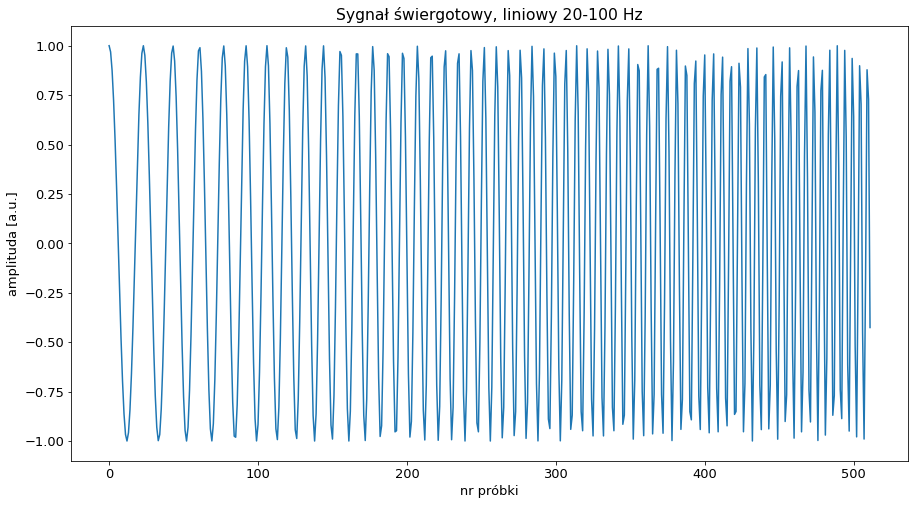

In [6]:
N = 512
fs = 500
dt = 1/fs
t = np.arange(N)*dt
f1 = 20
f2 = 100

chirp = sig.chirp(t, f1, t[-1], f2)

plt.plot(chirp)
plt.xlabel('nr próbki')
plt.ylabel('amplituda [a.u.]')
plt.title('Sygnał świergotowy, liniowy 20-100 Hz')
plt.show()

In [7]:
splot_d = sig.convolve(chirp, f_d, mode='same')
splot_g = sig.convolve(chirp, f_g, mode='same')

In [8]:
plt.plot(splot_d)

Error in callback <function flush_figures at 0x000002A125B45310> (for post_execute):


KeyboardInterrupt: 

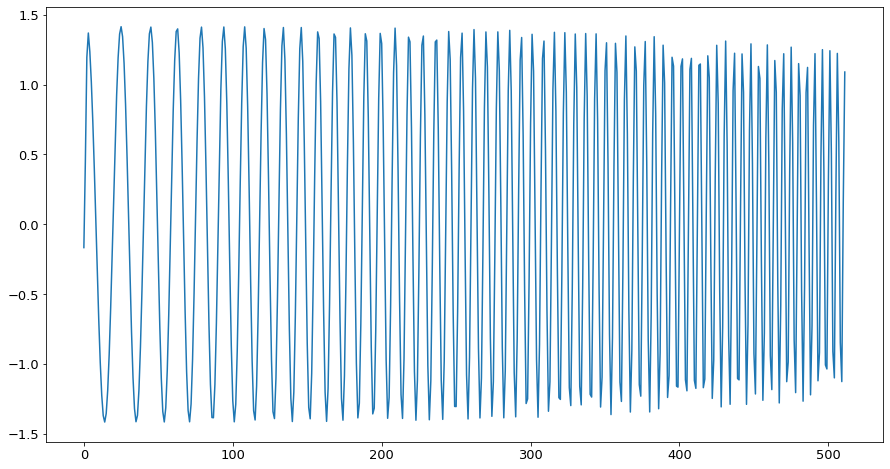

In [ ]:
plt.plot(splot_g)

In [ ]:
f_transform = np.fft.rfft(splot_g)

In [ ]:
f_transform2 = f_transform * np.conj(f_transform)

In [ ]:
np.argmax(f_transform2)

28

In [ ]:
f = np.fft.rfftfreq(N, 1/fs)

In [ ]:
f[np.argmax(f_transform2)]

27.34375

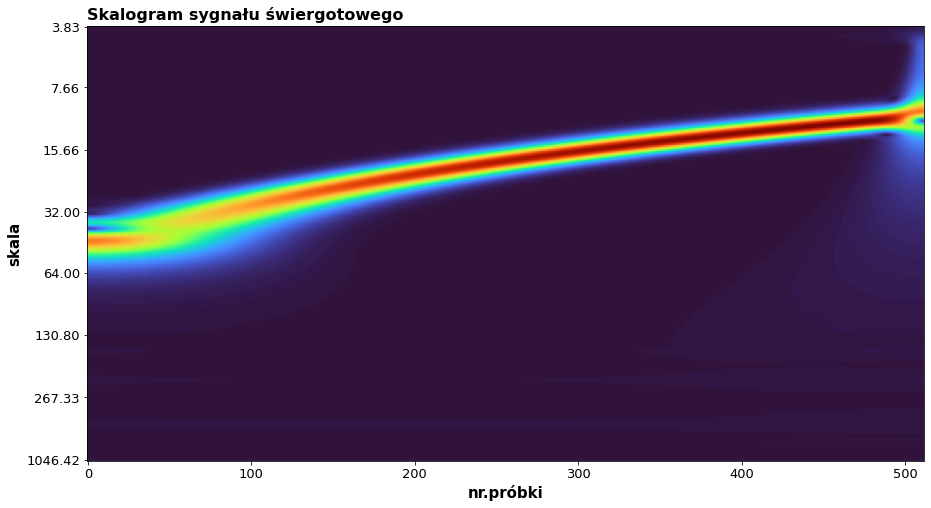

In [ ]:
Wx, scales = cwt(chirp, 'morlet')
imshow(Wx, yticks=scales, abs=1,
       title="Skalogram sygnału świergotowego",
       ylabel="skala", xlabel="nr.próbki")

In [11]:
wav_fname = 'rabarbar8k.wav'
samplerate, data = wavfile.read(wav_fname)

In [13]:
length = data.shape[0] / samplerate
time = np.linspace(0., length, data.shape[0])

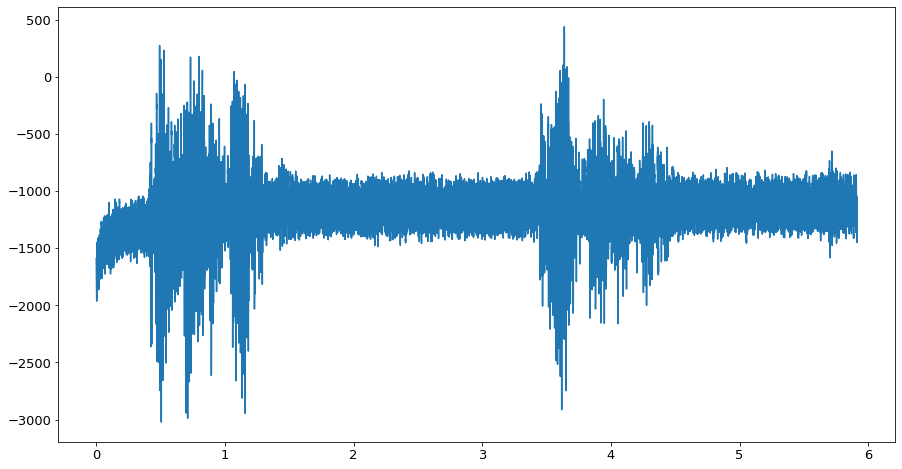

In [16]:
plt.plot(time,data)

In [17]:
data.shape[0]

47310

In [18]:
int(math.log2(data.shape[0]))

15